# Importing The Libraries And Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('Kolkata.csv')

# Data Visualisation

In [3]:
dataset

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,4208000,1570,Lake Town,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6503,10100000,1208,Narendrapur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6504,6669000,815,Rajarhat,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6505,4608000,952,Kaikhali,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


## Finding The correlation Between The Features

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(dataset.corr(),annot = True, linewidths=.5, ax=ax)

<AxesSubplot:>

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

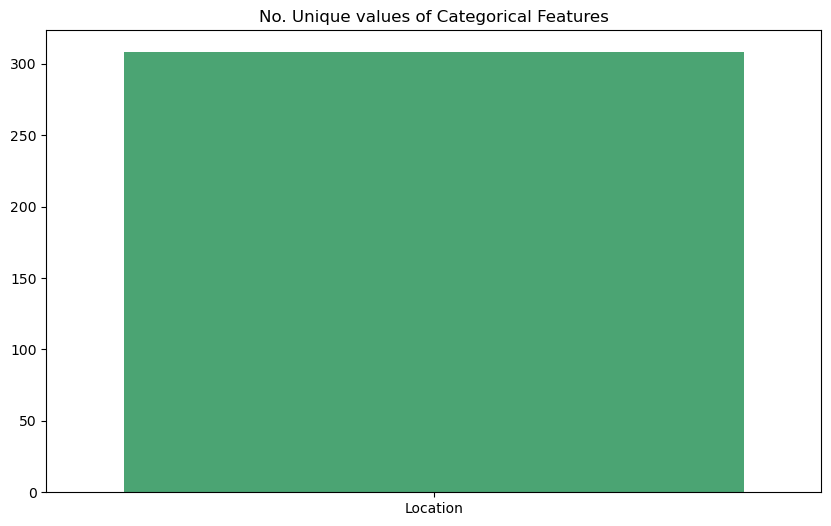

In [67]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=0)
sns.barplot(x=object_cols,y=unique_values,color='mediumseagreen')

/Users/sujalvijay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No. of Bedrooms', ylabel='Density'>

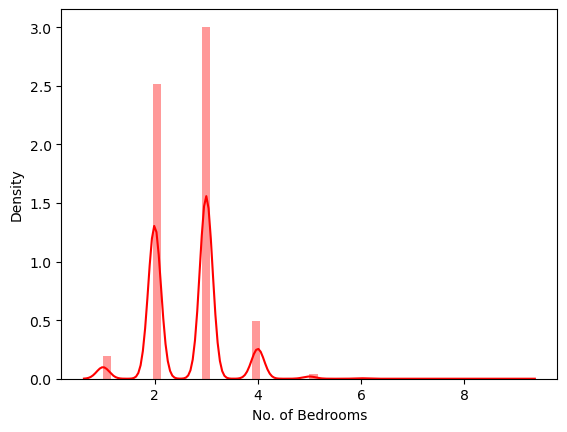

In [68]:
sns.distplot(dataset['No. of Bedrooms'],color='red')


/Users/sujalvijay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

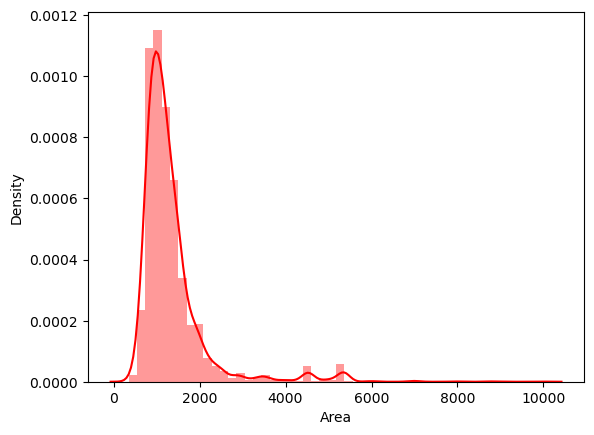

In [113]:
sns.distplot(dataset['Area'],color='red')

/Users/sujalvijay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

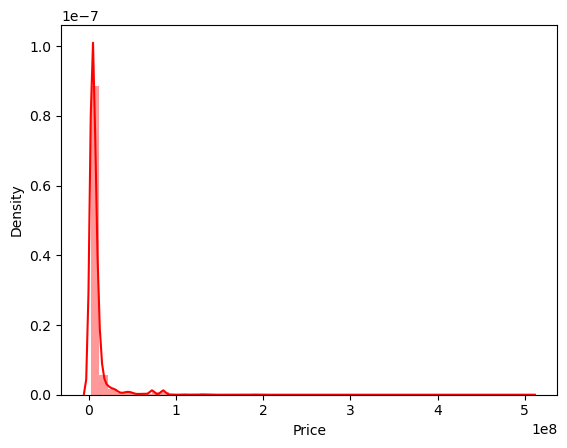

In [114]:
sns.distplot(dataset['Price'],color='red')

Text(0.5, 1.0, 'Price vs sqft_living')

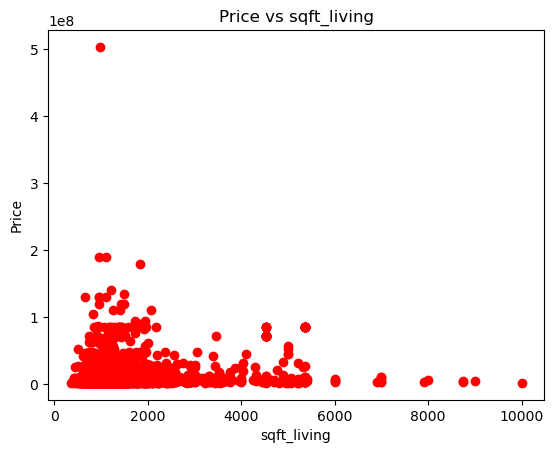

In [115]:
b=dataset['Price']
a=dataset['Area']
plt.scatter(a,b,color='red')
plt.ylabel('Price')
plt.xlabel('sqft_living',)
plt.title('Price vs sqft_living')

# Data Cleaning

## Checking For Missing Data

In [72]:
dataset.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


## Encoding Categorical Data

In [73]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df_city=tenc.fit_transform(dataset['Location'],dataset['Price'])

dataset = df_city.join(dataset.drop('Location',axis = 1))
dataset

,Location,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6.576916e+06,2235000,1016,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,4.885918e+06,3665999,1111,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,6.902901e+06,3774000,1020,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.152195e+06,2524000,935,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8.056197e+06,8300000,1956,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,7.502864e+06,4208000,1570,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6503,7.152195e+06,10100000,1208,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6504,6.902901e+06,6669000,815,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6505,5.621408e+06,4608000,952,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [74]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df
dataset=df_column_switch(dataset,"Location","Price")
X = dataset.iloc[[0,1,2]].values
y = dataset.iloc[:, 0].values
dataset

,Price,Location,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,6.576916e+06,1016,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,4.885918e+06,1111,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,6.902901e+06,1020,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,7.152195e+06,935,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,8.056197e+06,1956,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,4208000,7.502864e+06,1570,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6503,10100000,7.152195e+06,1208,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6504,6669000,6.902901e+06,815,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6505,4608000,5.621408e+06,952,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


## Taking Only Those Feature Which Are Correlated With Price Feature

Text(0.5, 1.0, 'Features correlation')

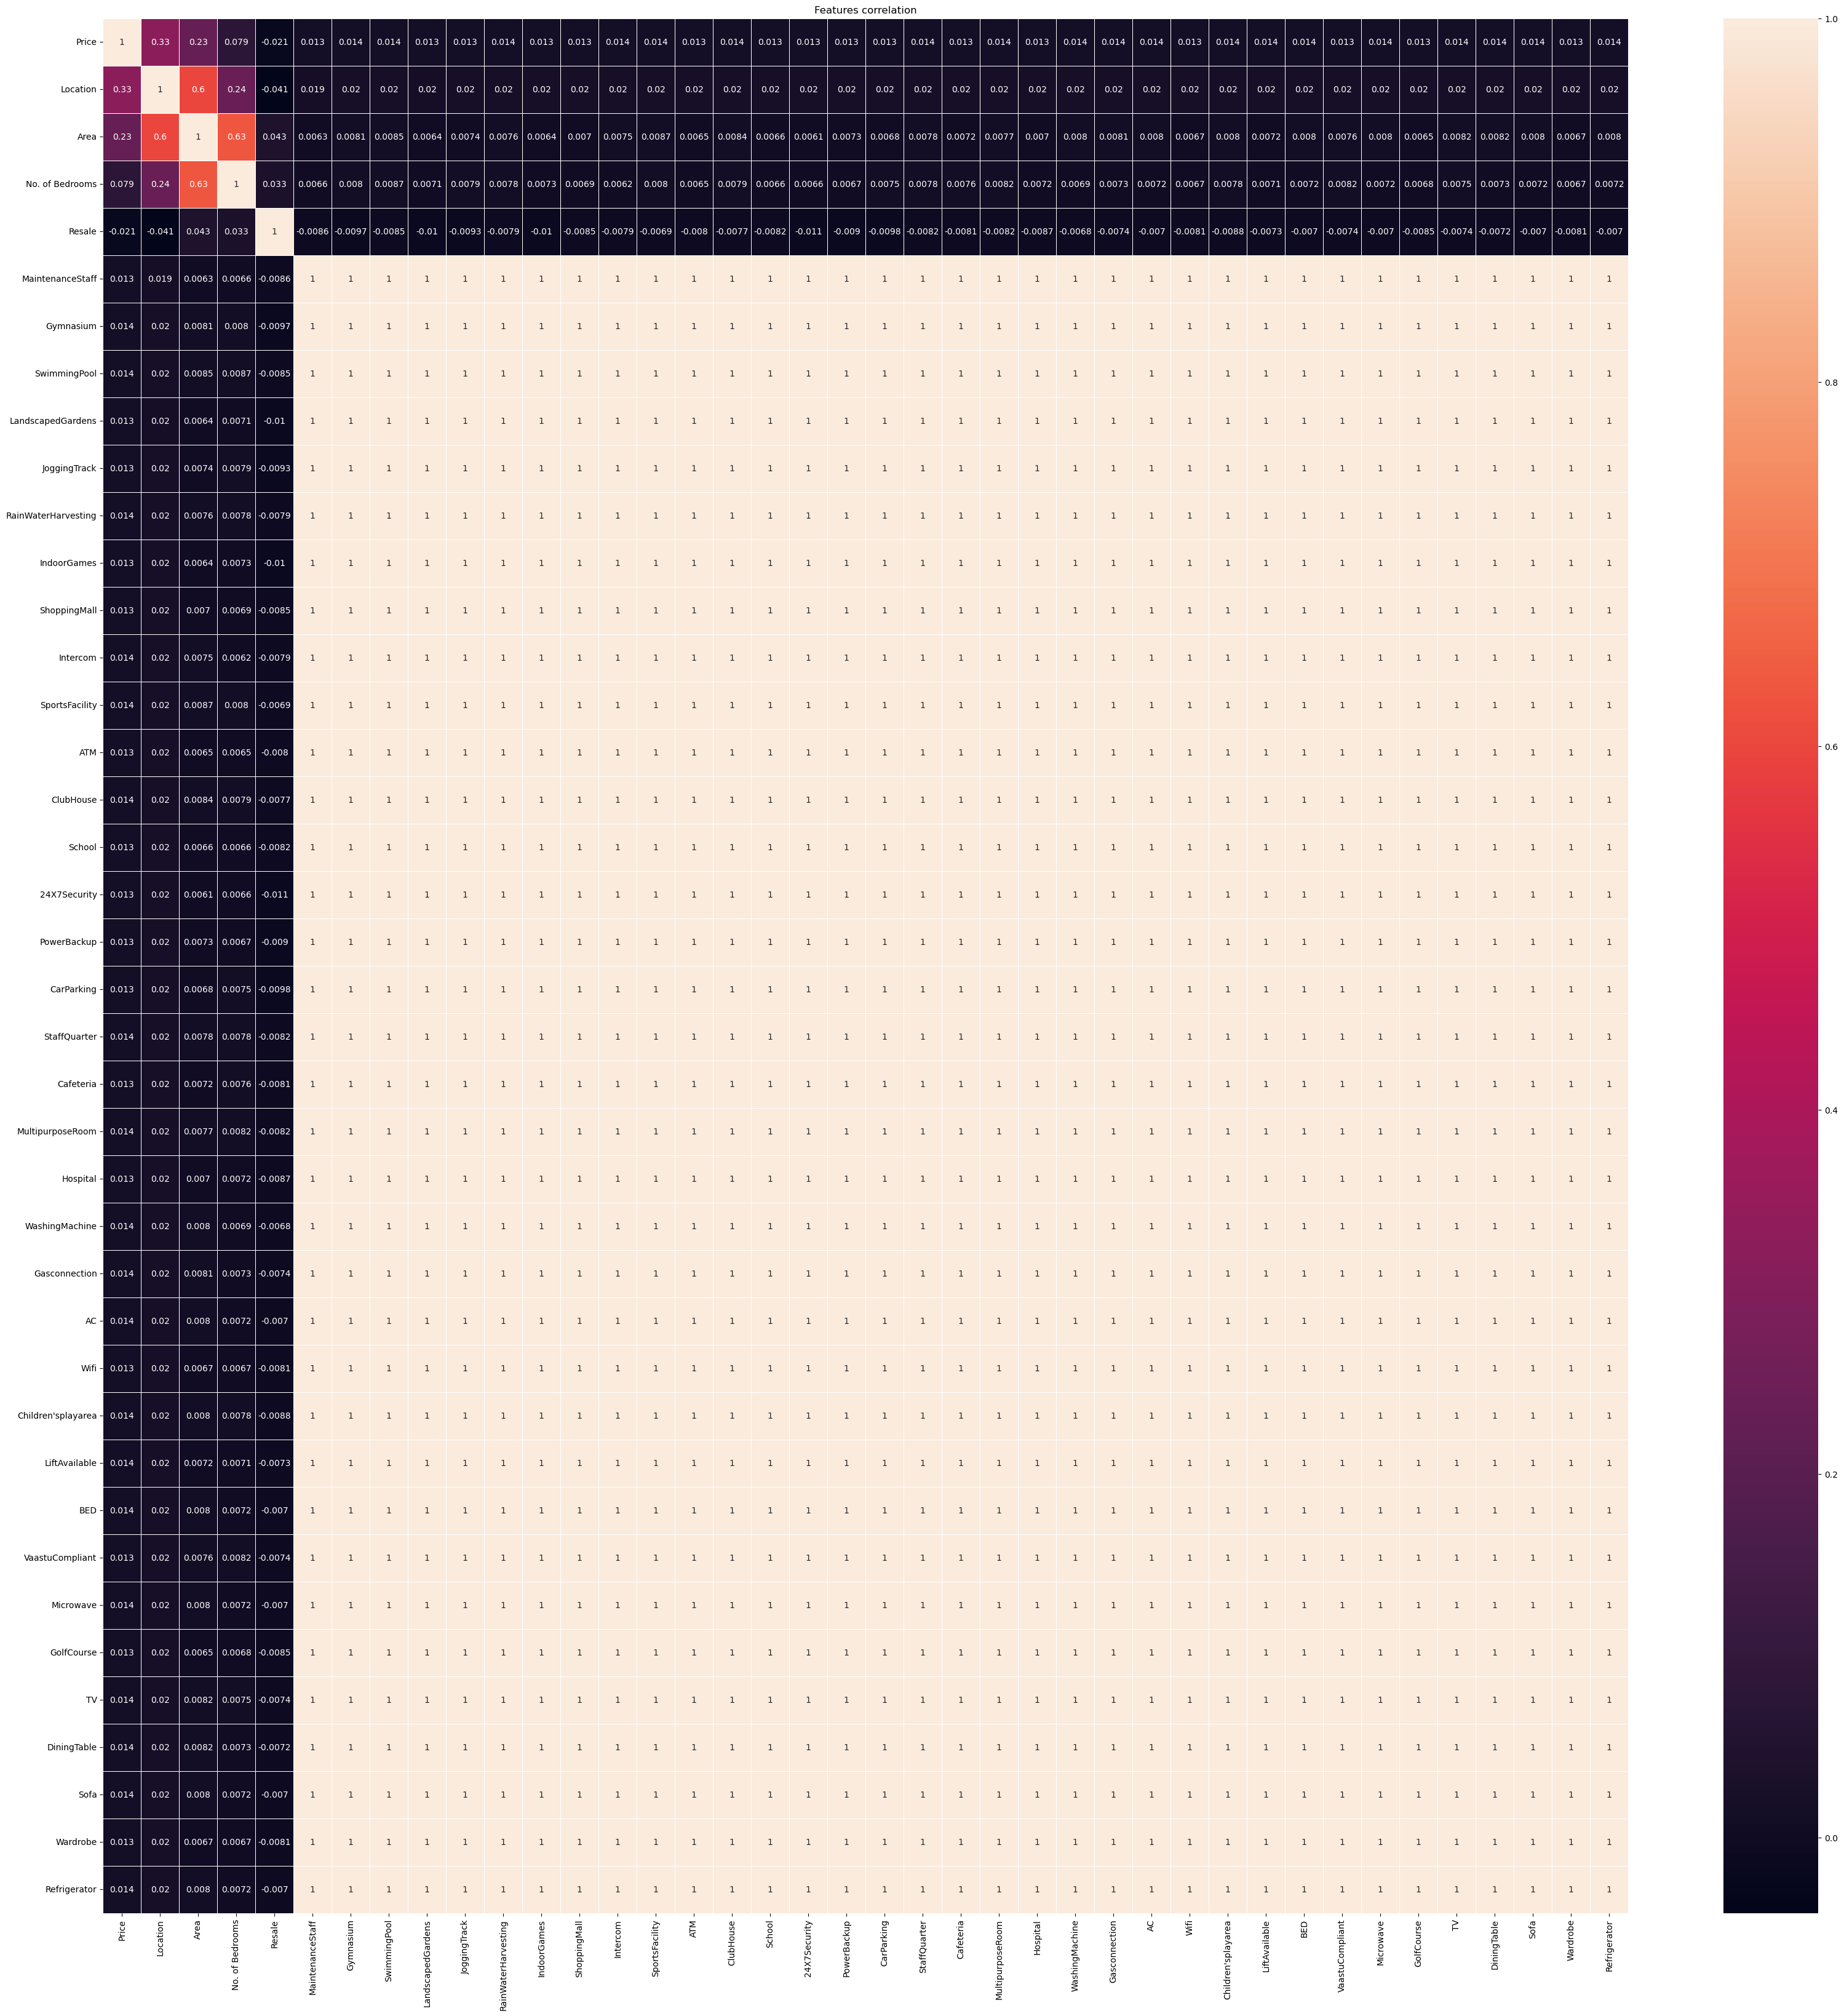

In [75]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(dataset.corr(),annot = True, linewidths=.5, ax=ax).set_title('Features correlation')

In [76]:
columns_titles = ["Price","Location","Area","No. of Bedrooms"]
dataset=dataset.reindex(columns=columns_titles)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 0].values

In [77]:
dataset=df_column_switch(dataset,"No. of Bedrooms","Price")

In [78]:
dataset

,No. of Bedrooms,Location,Area,Price
0,3,6.576916e+06,1016,2235000
1,2,4.885918e+06,1111,3665999
2,2,6.902901e+06,1020,3774000
3,2,7.152195e+06,935,2524000
4,3,8.056197e+06,1956,8300000
...,...,...,...,...
6502,3,7.502864e+06,1570,4208000
6503,3,7.152195e+06,1208,10100000
6504,2,6.902901e+06,815,6669000
6505,2,5.621408e+06,952,4608000


In [79]:
print(X)

[[2.24e+06 6.58e+06 1.02e+03]
 [3.67e+06 4.89e+06 1.11e+03]
 [3.77e+06 6.90e+06 1.02e+03]
 ...
 [6.67e+06 6.90e+06 8.15e+02]
 [4.61e+06 5.62e+06 9.52e+02]
 [9.15e+06 8.64e+06 1.13e+03]]


In [80]:
print(y)

[2235000 3665999 3774000 ... 6669000 4608000 9148000]


In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
dataset

,No. of Bedrooms,Location,Area,Price
0,3,6.576916e+06,1016,2235000
1,2,4.885918e+06,1111,3665999
2,2,6.902901e+06,1020,3774000
3,2,7.152195e+06,935,2524000
4,3,8.056197e+06,1956,8300000
...,...,...,...,...
6502,3,7.502864e+06,1570,4208000
6503,3,7.152195e+06,1208,10100000
6504,2,6.902901e+06,815,6669000
6505,2,5.621408e+06,952,4608000


## Splitting the dataset into the Training set and Test set

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Training the Linear Regression model on the Training set

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [85]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4000000. 4000000.]
 [3835000. 3835000.]
 [2631000. 2631000.]
 ...
 [8265000. 8265000.]
 [4266000. 4266000.]
 [2200000. 2200000.]]


Text(0.5, 1.0, 'Real Price vs Predicted Price')

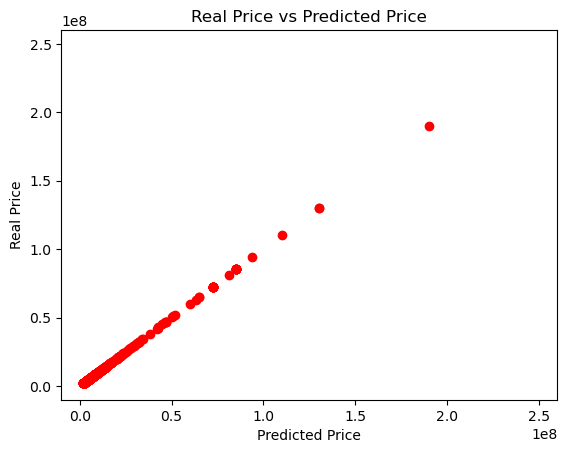

In [86]:
b=y_test.reshape(len(y_test),1)
a=y_pred.reshape(len(y_pred),1)
plt.xlim(-10000000,260000000)
plt.ylim(-10000000,260000000)
plt.scatter(a,b,color='red',)
plt.ylabel('Real Price')
plt.xlabel('Predicted Price')
plt.title('Real Price vs Predicted Price')

## Analysing The Score

In [87]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

R2_Score = r2_score(y_test, y_pred)
Mean_Absolute_Error = mean_absolute_error(y_test, y_pred)
Mean_Square_Error = mean_squared_error(y_test, y_pred)
Root_Mean_Square_Error = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame([['Multiple Linear Regression', R2_Score, Mean_Absolute_Error, Mean_Square_Error, Root_Mean_Square_Error]],
                      columns = ['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error'])

In [88]:
results

,Model,R2 Score,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Multiple Linear Regression,1.0,1.872659e-09,3.787879e-17,6.154575e-09
